In [2898]:
from multi_imbalance.datasets import load_datasets
import experiment_v2 as ex
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from multi_imbalance.utils.metrics import gmean_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from utils import plot_embeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [2899]:
datasets = load_datasets()

In [2900]:
ds_name = '4delikatne-bezover-cut'
test_on_all_folds = True
test_all_ds = False

In [2901]:
datasets = ex.one_hot_encode_all(datasets)

In [2902]:
config = ex.config_calculation_strategy2(datasets)

In [2903]:
config['cmc'] = {'nn_config': {'units_1st_layer': 17,
                               'units_2nd_layer': 256,
                               'units_3rd_layer': 128,
                               'units_latent_layer': 8},
                 'weighted_triplet_loss': True,
                 'lr': 0.0002,
                 'batch_size': 16,
                 'gamma': 0.99,
                 'epochs': 55}


config['dermatology'] = {'nn_config': {'units_1st_layer': 97,
                                       'units_2nd_layer': 512,
                                       'units_3rd_layer': 256,
                                       'units_latent_layer': 16},
                         'weighted_triplet_loss': True,
                         'lr': 0.0010,
                         'batch_size': 16,
                         'gamma': 0.99,
                         'epochs': 45}

config['hayes-roth'] = {'nn_config': {'units_1st_layer': 11,
                                      'units_2nd_layer': 128,
                                      'units_3rd_layer': 64,
                                      'units_latent_layer': 16},
                        'weighted_triplet_loss': True,
                        'lr': 0.0015,
                        'batch_size': 16,
                        'gamma': 0.99,
                        'epochs': 300}

config['new_vehicle'] = {'nn_config': {'units_1st_layer': 18,
                                       'units_2nd_layer': 256,
                                       'units_3rd_layer': 128,
                                       'units_latent_layer': 16},
                         'weighted_triplet_loss': True,
                         'lr': 0.003,
                         'batch_size': 16,
                         'gamma': 0.99,
                         'epochs': 100}

config['new_yeast'] = {'nn_config': {'units_1st_layer': 9,
                                     'units_2nd_layer': 300,
                                     'units_3rd_layer': 200,
                                     'units_latent_layer': 12},
                       'weighted_triplet_loss': True,
                       'lr': 0.0004,
                       'batch_size': 32,
                       'gamma': 0.99,
                       'epochs': 60}

config['balance-scale'] = {'nn_config': {'units_1st_layer': 16,
                                         'units_2nd_layer': 256,
                                         'units_3rd_layer': 128,
                                         'units_latent_layer': 10},
                           'weighted_triplet_loss': True,
                           'lr': 0.007,
                           'batch_size': 16,
                           'gamma': 0.99,
                           'epochs': 100}

config['cleveland'] = {'nn_config': {'units_1st_layer': 24,
                                     'units_2nd_layer': 72,
                                     'units_3rd_layer': 48,
                                     'units_latent_layer': 16},
                       'weighted_triplet_loss': True,
                       'lr': 0.00002,
                       'batch_size': 16,
                       'gamma': 0.99,
                       'epochs': 120}

config['cleveland_v2'] = {'nn_config': {'units_1st_layer': 23,
                                        'units_2nd_layer': 256,
                                        'units_3rd_layer': 128,
                                        'units_latent_layer': 16},
                          'weighted_triplet_loss': True,
                          'lr': 0.00002,
                          'batch_size': 16,
                          'gamma': 0.99,
                          'epochs': 100}

config['glass'] = {'nn_config': {'units_1st_layer': 9,
                                 'units_2nd_layer': 256,
                                 'units_3rd_layer': 128,
                                 'units_latent_layer': 12},
                   'weighted_triplet_loss': True,
                   'lr': 0.001,
                   'batch_size': 16,
                   'gamma': 0.99,
                   'epochs': 120}

config['thyroid-newthyroid'] = {'nn_config': {'units_1st_layer': 5,
                                              'units_2nd_layer': 64,
                                              'units_3rd_layer': 32,
                                              'units_latent_layer': 8},
                                'weighted_triplet_loss': True,
                                'lr': 0.001,
                                'batch_size': 16,
                                'gamma': 0.99,
                                'epochs': 120}

config['new_ecoli'] = {'nn_config': {'units_1st_layer': 7,
                                     'units_2nd_layer': 128,
                                     'units_3rd_layer': 64,
                                     'units_latent_layer': 12},
                       'weighted_triplet_loss': True,
                       'lr': 0.0001,
                       'batch_size': 16,
                       'gamma': 0.99,
                       'epochs': 100}

config['new_led7digit'] = {'nn_config': {'units_1st_layer': 7,
                                         'units_2nd_layer': 64,
                                         'units_3rd_layer': 32,
                                         'units_latent_layer': 8},
                           'weighted_triplet_loss': True,
                           'lr': 0.001,
                           'batch_size': 16,
                           'gamma': 0.99,
                           'epochs': 100}

config['new_winequality-red'] = {'nn_config': {'units_1st_layer': 11,
                                               'units_2nd_layer': 128,
                                               'units_3rd_layer': 64,
                                               'units_latent_layer': 12},
                                 'weighted_triplet_loss': True,
                                 'lr': 0.003,
                                 'batch_size': 16,
                                 'gamma': 0.99,
                                 'epochs': 100}

config['4delikatne-bezover-cut'] = {'nn_config': {'units_1st_layer': 2,
                                                  'units_2nd_layer': 128,
                                                  'units_3rd_layer': 64,
                                                  'units_latent_layer': 8},
                                    'weighted_triplet_loss': True,
                                    'lr': 0.07,
                                    'batch_size': 16,
                                    'gamma': 0.99,
                                    'epochs': 100}

config['3mocniej-cut'] = {'nn_config': {'units_1st_layer': 2,
                                        'units_2nd_layer': 128,
                                        'units_3rd_layer': 64,
                                        'units_latent_layer': 10},
                          'weighted_triplet_loss': True,
                          'lr': 0.04,
                          'batch_size': 16,
                          'gamma': 0.99,
                          'epochs': 90}


config['1czysty-cut'] = {'nn_config': {'units_1st_layer': 2,
                                       'units_2nd_layer': 64,
                                       'units_3rd_layer': 32,
                                       'units_latent_layer': 8},
                         'weighted_triplet_loss': True,
                         'lr': 0.004,
                         'batch_size': 16,
                         'gamma': 0.99,
                         'epochs': 130}

config['2delikatne-cut'] = {'nn_config': {'units_1st_layer': 2,
                                          'units_2nd_layer': 128,
                                          'units_3rd_layer': 64,
                                          'units_latent_layer': 12},
                            'weighted_triplet_loss': True,
                            'lr': 0.04,
                            'batch_size': 16,
                            'gamma': 0.99,
                            'epochs': 90}

In [2904]:
config

{'1czysty-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 8},
  'weighted_triplet_loss': True,
  'lr': 0.004,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 130},
 '2delikatne-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 128,
   'units_3rd_layer': 64,
   'units_latent_layer': 12},
  'weighted_triplet_loss': True,
  'lr': 0.04,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 90},
 '3mocniej-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 128,
   'units_3rd_layer': 64,
   'units_latent_layer': 10},
  'weighted_triplet_loss': True,
  'lr': 0.04,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 90},
 '4delikatne-bezover-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 128,
   'units_3rd_layer': 64,
   'units_latent_layer': 8},
  'weighted_triplet_loss': True,
  'lr': 0.075,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100},
 'balance-scale': {'nn_config': {'un

In [2905]:
def instantiate_classifiers():
    classifiers = {
            "RF24": RandomForestClassifier(random_state=0, min_samples_leaf=2, min_samples_split=4, class_weight='balanced'),
            "DT": DecisionTreeClassifier(random_state=0, min_samples_split=4, min_samples_leaf=2, class_weight='balanced'),
            "KNN": KNeighborsClassifier(n_neighbors=1),
            "QDA": QuadraticDiscriminantAnalysis(),
            "LDA": LinearDiscriminantAnalysis()
        } 
    return classifiers

In [2906]:
from experiment import dt_name_to_cols_to_encode


In [2907]:
from sklearn.neighbors import KNeighborsClassifier

def calc_safety5(X,y):
    result = defaultdict(int)
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(X, y)
    neighbors = neigh.kneighbors(X, 5+1, False)
    for i, (x, nbors) in enumerate(list(zip(X, neighbors))):
#         print(x)
#         print(y[i])
#         print(nbors[1:])
#         print(y[nbors[1:]])
        same_class_nbrs = (y[nbors[1:]] == y[i]).sum()
        if same_class_nbrs >= 4:
            result['safe'] += 1
        elif same_class_nbrs >= 2:
            result['borderline'] += 1
        elif same_class_nbrs == 1:
            result['rare'] += 1
        else:
            result['outlier'] += 1
    return result

In [2908]:
def standardize(X_train, X_test):
    means = X_train.mean(axis=0)
    stds = X_train.std(axis=0)
    return (X_train - means) / (stds+1e-6), (X_test - means) / (stds + 1e-6)

4delikatne-bezover-cut


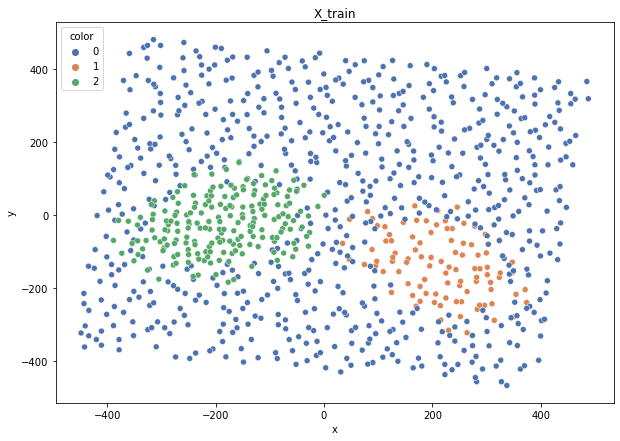

Class cardinalities: Counter({0: 672, 2: 192, 1: 96})
Weights: {1: 0.6086956521739131, 0: 0.08695652173913043, 2: 0.30434782608695654}


100%|██████████| 240/240 [00:00<00:00, 3048.58it/s]


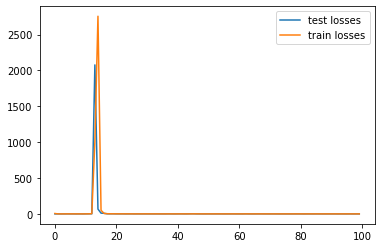

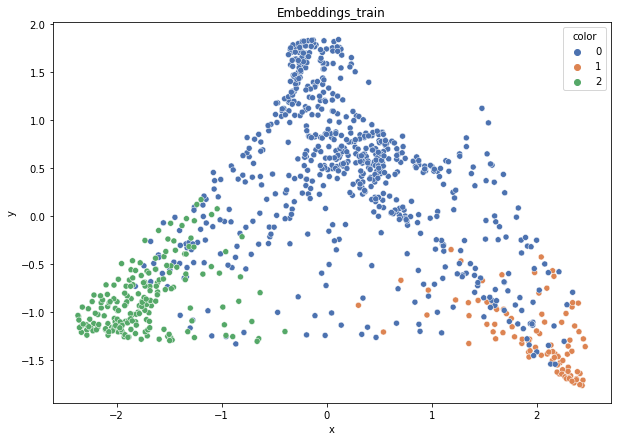

DT-f1-new-features: 0.791
DT-f1-old+new-features: 0.816
DT-f1-old-features: 0.809
DT-gmean-new-features: 0.78
DT-gmean-old+new-features: 0.806
DT-gmean-old-features: 0.814
KNN-f1-new-features: 0.792
KNN-f1-old+new-features: 0.775
KNN-f1-old-features: 0.772
KNN-gmean-new-features: 0.76
KNN-gmean-old+new-features: 0.737
KNN-gmean-old-features: 0.746
LDA-f1-new-features: 0.797
LDA-f1-old+new-features: 0.799
LDA-f1-old-features: 0.265
LDA-gmean-new-features: 0.844
LDA-gmean-old+new-features: 0.821
LDA-gmean-old-features: 0.026
QDA-f1-new-features: 0.794
QDA-f1-old+new-features: 0.817
QDA-f1-old-features: 0.739
QDA-gmean-new-features: 0.838
QDA-gmean-old+new-features: 0.869
QDA-gmean-old-features: 0.64
RF24-f1-new-features: 0.802
RF24-f1-old+new-features: 0.805
RF24-f1-old-features: 0.811
RF24-gmean-new-features: 0.809
RF24-gmean-old+new-features: 0.809
RF24-gmean-old-features: 0.811


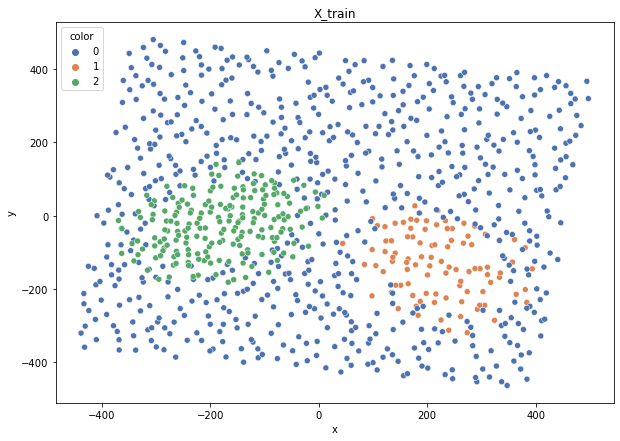

Class cardinalities: Counter({0: 672, 2: 192, 1: 96})
Weights: {1: 0.6086956521739131, 0: 0.08695652173913043, 2: 0.30434782608695654}


100%|██████████| 240/240 [00:00<00:00, 2940.38it/s]


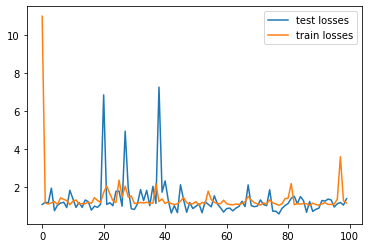

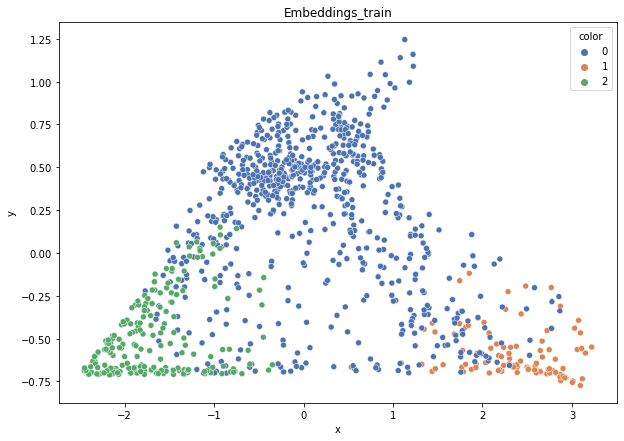

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


DT-f1-new-features: 0.791
DT-f1-old+new-features: 0.785
DT-f1-old-features: 0.761
DT-gmean-new-features: 0.839
DT-gmean-old+new-features: 0.8
DT-gmean-old-features: 0.769
KNN-f1-new-features: 0.79
KNN-f1-old+new-features: 0.812
KNN-f1-old-features: 0.767
KNN-gmean-new-features: 0.796
KNN-gmean-old+new-features: 0.815
KNN-gmean-old-features: 0.776
LDA-f1-new-features: 0.832
LDA-f1-old+new-features: 0.832
LDA-f1-old-features: 0.274
LDA-gmean-new-features: 0.885
LDA-gmean-old+new-features: 0.885
LDA-gmean-old-features: 0.027
QDA-f1-new-features: 0.76
QDA-f1-old+new-features: 0.689
QDA-f1-old-features: 0.843
QDA-gmean-new-features: 0.88
QDA-gmean-old+new-features: 0.841
QDA-gmean-old-features: 0.8
RF24-f1-new-features: 0.801
RF24-f1-old+new-features: 0.811
RF24-f1-old-features: 0.826
RF24-gmean-new-features: 0.821
RF24-gmean-old+new-features: 0.83
RF24-gmean-old-features: 0.845


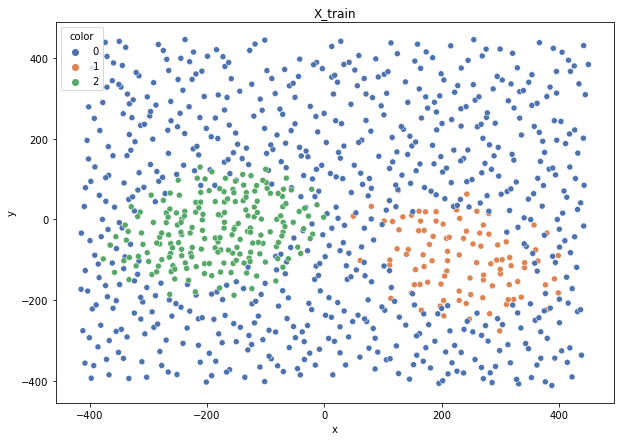

Class cardinalities: Counter({0: 672, 2: 192, 1: 96})
Weights: {1: 0.6086956521739131, 0: 0.08695652173913043, 2: 0.30434782608695654}


100%|██████████| 240/240 [00:00<00:00, 2965.72it/s]


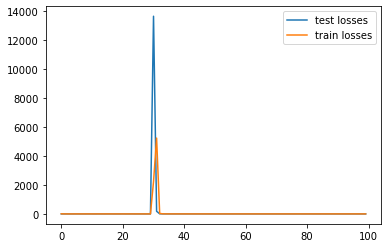

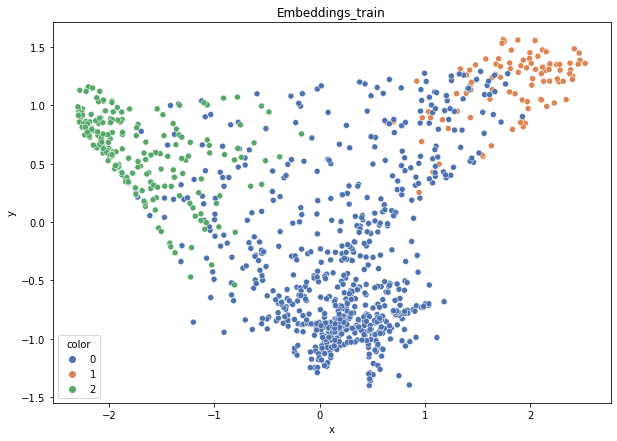

DT-f1-new-features: 0.807
DT-f1-old+new-features: 0.818
DT-f1-old-features: 0.785
DT-gmean-new-features: 0.79
DT-gmean-old+new-features: 0.808
DT-gmean-old-features: 0.785
KNN-f1-new-features: 0.79
KNN-f1-old+new-features: 0.776
KNN-f1-old-features: 0.766
KNN-gmean-new-features: 0.772
KNN-gmean-old+new-features: 0.748
KNN-gmean-old-features: 0.744
LDA-f1-new-features: 0.832
LDA-f1-old+new-features: 0.828
LDA-f1-old-features: 0.276
LDA-gmean-new-features: 0.852
LDA-gmean-old+new-features: 0.85
LDA-gmean-old-features: 0.027
QDA-f1-new-features: 0.848
QDA-f1-old+new-features: 0.857
QDA-f1-old-features: 0.718
QDA-gmean-new-features: 0.891
QDA-gmean-old+new-features: 0.914
QDA-gmean-old-features: 0.599
RF24-f1-new-features: 0.812
RF24-f1-old+new-features: 0.808
RF24-f1-old-features: 0.801
RF24-gmean-new-features: 0.788
RF24-gmean-old+new-features: 0.785
RF24-gmean-old-features: 0.78


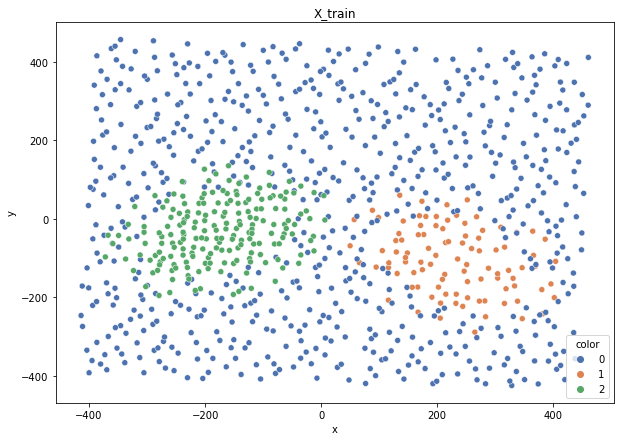

Class cardinalities: Counter({0: 672, 2: 192, 1: 96})
Weights: {1: 0.6086956521739131, 0: 0.08695652173913043, 2: 0.30434782608695654}


100%|██████████| 240/240 [00:00<00:00, 2953.39it/s]


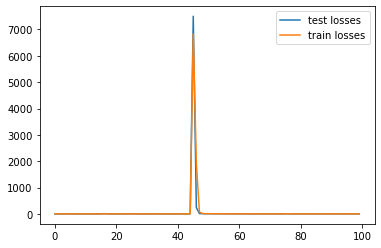

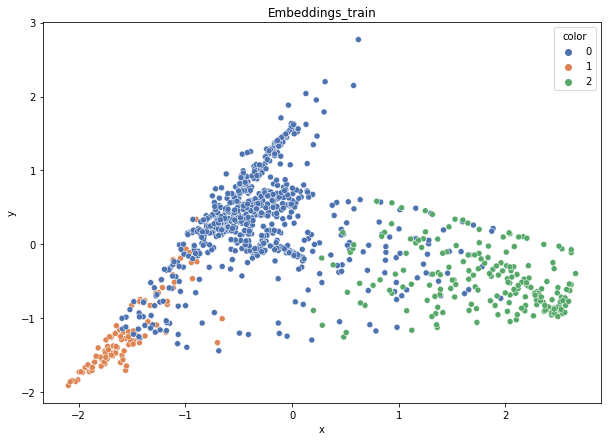

DT-f1-new-features: 0.77
DT-f1-old+new-features: 0.77
DT-f1-old-features: 0.805
DT-gmean-new-features: 0.82
DT-gmean-old+new-features: 0.811
DT-gmean-old-features: 0.831
KNN-f1-new-features: 0.776
KNN-f1-old+new-features: 0.767
KNN-f1-old-features: 0.747
KNN-gmean-new-features: 0.8
KNN-gmean-old+new-features: 0.791
KNN-gmean-old-features: 0.749
LDA-f1-new-features: 0.863
LDA-f1-old+new-features: 0.831
LDA-f1-old-features: 0.265
LDA-gmean-new-features: 0.923
LDA-gmean-old+new-features: 0.91
LDA-gmean-old-features: 0.01
QDA-f1-new-features: 0.821
QDA-f1-old+new-features: 0.802
QDA-f1-old-features: 0.828
QDA-gmean-new-features: 0.908
QDA-gmean-old+new-features: 0.899
QDA-gmean-old-features: 0.78
RF24-f1-new-features: 0.835
RF24-f1-old+new-features: 0.811
RF24-f1-old-features: 0.827
RF24-gmean-new-features: 0.868
RF24-gmean-old+new-features: 0.85
RF24-gmean-old-features: 0.871


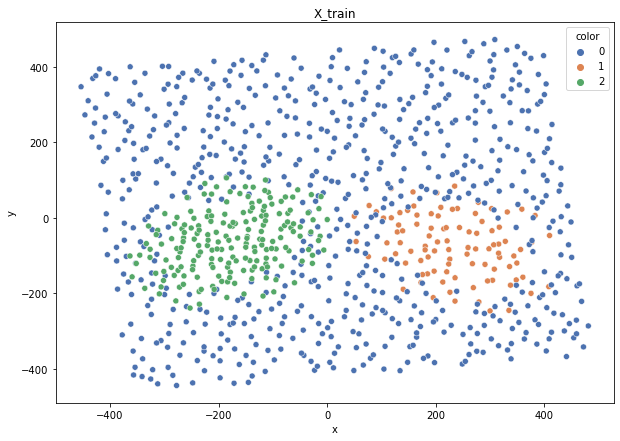

Class cardinalities: Counter({0: 672, 2: 192, 1: 96})
Weights: {1: 0.6086956521739131, 0: 0.08695652173913043, 2: 0.30434782608695654}


100%|██████████| 240/240 [00:00<00:00, 3132.12it/s]


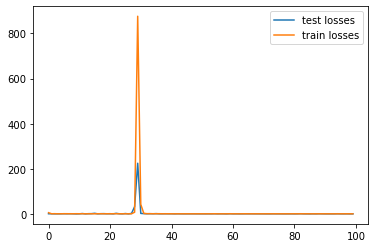

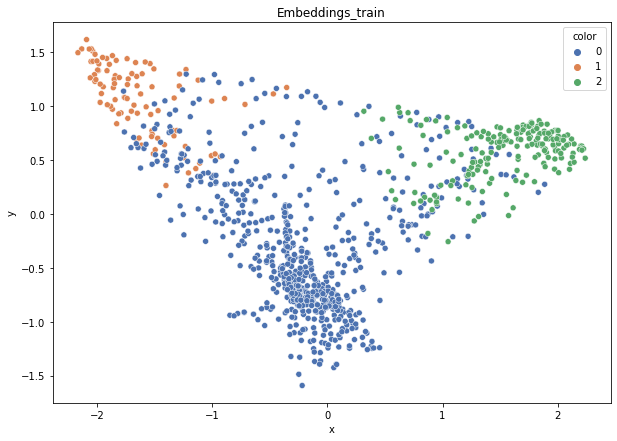

DT-f1-new-features: 0.825
DT-f1-old+new-features: 0.82
DT-f1-old-features: 0.821
DT-gmean-new-features: 0.827
DT-gmean-old+new-features: 0.825
DT-gmean-old-features: 0.866
KNN-f1-new-features: 0.815
KNN-f1-old+new-features: 0.814
KNN-f1-old-features: 0.786
KNN-gmean-new-features: 0.832
KNN-gmean-old+new-features: 0.826
KNN-gmean-old-features: 0.788
LDA-f1-new-features: 0.875
LDA-f1-old+new-features: 0.89
LDA-f1-old-features: 0.264
LDA-gmean-new-features: 0.932
LDA-gmean-old+new-features: 0.931
LDA-gmean-old-features: 0.026
QDA-f1-new-features: 0.859
QDA-f1-old+new-features: 0.835
QDA-f1-old-features: 0.841
QDA-gmean-new-features: 0.934
QDA-gmean-old+new-features: 0.932
QDA-gmean-old-features: 0.767
RF24-f1-new-features: 0.851
RF24-f1-old+new-features: 0.838
RF24-f1-old-features: 0.836
RF24-gmean-new-features: 0.878
RF24-gmean-old+new-features: 0.861
RF24-gmean-old-features: 0.87


In [2909]:
result_dict = defaultdict(list)

safety_dict = defaultdict(list)

if test_all_ds:
    ds_names = dt_name_to_cols_to_encode.keys()
else:
    ds_names = [ds_name]
for dataset_name in ds_names:
# for dataset_name in list(datasets.keys()):
    print(dataset_name)
    result_dict["dataset"].append(dataset_name)
    fold_result_dict = defaultdict(list)
    
    safety_dict["dataset"].append(dataset_name)
    fold_safety_dict = defaultdict(list)

    X, y = datasets[dataset_name]['data'], datasets[dataset_name]['target']
    X_encoded, y = datasets[f"{dataset_name}_encoded"]['data'], datasets[f"{dataset_name}_encoded"]['target']
    
    skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    n_splits = skf.get_n_splits(X, y)
    
    folds = []
    if test_on_all_folds:
        folds = skf.split(X, y)
    else:
        folds = list(skf.split(X, y))[1:2]
        
    for train_index, test_index in folds:
        X_train, X_test = X[train_index], X[test_index]
        X_train_norm, X_test_norm = standardize(X_train, X_test)
        y_train, y_test = y[train_index], y[test_index]
        
        
        X_train_enc, X_test_enc = X_encoded[train_index], X_encoded[test_index]
        X_train_enc, X_test_enc = standardize(X_train_enc, X_test_enc)
        
        
        # PCA X_train
        pca = PCA(n_components=2)
        plot_embeddings(pca.fit_transform(X_train), y_train)
        plt.title("X_train")
        plt.show()
        
        weights = ex.weights_calculation_strategy1(X_train, y_train)
        cfg =  config[dataset_name]
        # pretrain ANN triplets
        embeddings_train, embeddings_test = ex.train_triplets(X_train_enc, y_train, X_test_enc, y_test, weights,cfg)
        
        s_dict = calc_safety5(embeddings_test, y_test)
        for k, v in s_dict.items():
            fold_safety_dict[f"emb-{k}"].append(v)
            
        s_dict = calc_safety5(X_test_enc, y_test)
        for k,v in s_dict.items():
            fold_safety_dict[f"raw-{k}"].append(v)
        
        # PCA embeddings_train
        pca = PCA(n_components=2)
        plot_embeddings(pca.fit_transform(embeddings_train), y_train)
        plt.title("Embeddings_train")
        plt.show()
        
        X_train_new = np.hstack([X_train_norm, embeddings_train])
        X_test_new = np.hstack([X_test_norm, embeddings_test])
        
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train_norm, y_train)
            preds = clf.predict(X_test_norm)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-old-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-old-features"].append(gmean)
            
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train_new, y_train)
            preds = clf.predict(X_test_new)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-old+new-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-old+new-features"].append(gmean)
            
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(embeddings_train, y_train)
            preds = clf.predict(embeddings_test)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-new-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-new-features"].append(gmean)
        for key in sorted(list(fold_result_dict.keys())):
            print(f"{key}: {np.round(fold_result_dict[key][-1],3)}")
            
    for k in fold_result_dict:
        result_dict[k].append(np.mean(fold_result_dict[k]))
        
    for k in fold_safety_dict:
        safety_dict[k].append(np.sum(fold_safety_dict[k]) / X.shape[0])

In [2910]:
results_df = pd.DataFrame.from_dict(result_dict)

In [2911]:
safety_df = pd.DataFrame.from_dict(safety_dict)

In [2912]:
results_df

,dataset,RF24-f1-old-features,RF24-gmean-old-features,DT-f1-old-features,DT-gmean-old-features,KNN-f1-old-features,KNN-gmean-old-features,QDA-f1-old-features,QDA-gmean-old-features,LDA-f1-old-features,...,RF24-f1-new-features,RF24-gmean-new-features,DT-f1-new-features,DT-gmean-new-features,KNN-f1-new-features,KNN-gmean-new-features,QDA-f1-new-features,QDA-gmean-new-features,LDA-f1-new-features,LDA-gmean-new-features
0,4delikatne-bezover-cut,0.820201,0.835313,0.796105,0.813035,0.767612,0.760887,0.793653,0.717321,0.268589,...,0.820161,0.832872,0.796764,0.811292,0.792649,0.792139,0.816509,0.890275,0.839797,0.88715


In [2913]:
safety_df[sorted(safety_df.filter(regex=("dataset|emb")).columns)].style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,emb-borderline,emb-outlier,emb-rare,emb-safe
0,4delikatne-bezover-cut,0.150833,0.019167,0.039167,0.790833


In [2914]:
safety_df[sorted(safety_df.filter(regex=("dataset|raw")).columns)].style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,raw-borderline,raw-outlier,raw-rare,raw-safe
0,4delikatne-bezover-cut,0.185833,0.010833,0.040833,0.762500


In [2915]:
safety_df[sorted(safety_df.filter(regex=("dataset|.*safe")).columns)].style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,emb-safe,raw-safe
0,4delikatne-bezover-cut,0.790833,0.762500


In [2916]:
results_df.filter(regex=("dataset|RF24-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,RF24-f1-old-features,RF24-f1-old+new-features,RF24-f1-new-features
0,4delikatne-bezover-cut,0.820201,0.814605,0.820161


In [2917]:
results_df.filter(regex=("dataset|RF24-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,RF24-gmean-old-features,RF24-gmean-old+new-features,RF24-gmean-new-features
0,4delikatne-bezover-cut,0.835313,0.826967,0.832872


In [2918]:
results_df.filter(regex=("dataset|DT-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,DT-f1-old-features,DT-f1-old+new-features,DT-f1-new-features
0,4delikatne-bezover-cut,0.796105,0.801757,0.796764


In [2919]:
results_df.filter(regex=("dataset|DT-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,DT-gmean-old-features,DT-gmean-old+new-features,DT-gmean-new-features
0,4delikatne-bezover-cut,0.813035,0.810117,0.811292


In [2920]:
results_df.filter(regex=("dataset|KNN-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,KNN-f1-old-features,KNN-f1-old+new-features,KNN-f1-new-features
0,4delikatne-bezover-cut,0.767612,0.788925,0.792649


In [2921]:
results_df.filter(regex=("dataset|KNN-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,KNN-gmean-old-features,KNN-gmean-old+new-features,KNN-gmean-new-features
0,4delikatne-bezover-cut,0.760887,0.783197,0.792139


In [2922]:
results_df.filter(regex=("dataset|QDA-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,QDA-f1-old-features,QDA-f1-old+new-features,QDA-f1-new-features
0,4delikatne-bezover-cut,0.793653,0.800201,0.816509


In [2923]:
results_df.filter(regex=("dataset|QDA-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,QDA-gmean-old-features,QDA-gmean-old+new-features,QDA-gmean-new-features
0,4delikatne-bezover-cut,0.717321,0.891020,0.890275


In [2924]:
results_df.filter(regex=("dataset|LDA-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,LDA-f1-old-features,LDA-f1-old+new-features,LDA-f1-new-features
0,4delikatne-bezover-cut,0.268589,0.836174,0.839797


In [2925]:
results_df.filter(regex=("dataset|LDA-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,LDA-gmean-old-features,LDA-gmean-old+new-features,LDA-gmean-new-features
0,4delikatne-bezover-cut,0.023236,0.879449,0.887150
